In [54]:
import numpy as np
import matplotlib.pyplot as plt

I) Afficher les 100 graphiques

Cette fonction ouvre un fichier csv, extrait les colonnes puis créer les courbes pour chaque colonnes

In [55]:
def plot_epidemic_data(file_path):
    # Charger les données à partir du fichier CSV
    data = np.loadtxt(file_path, delimiter=',')

    # Extraire les colonnes
    susceptible = data[:, 0]
    exposed = data[:, 1]
    infected = data[:, 2]
    recovered = data[:, 3]

    # Créer un tableau de jours (1, 2, 3, ..., n)
    days = np.arange(1, len(susceptible) + 1)

    # Tracer les courbes
    plt.figure(figsize=(10, 5))
    plt.plot(days, susceptible, label='Susceptible', color='blue')
    plt.plot(days, exposed, label='Exposed', color='orange')
    plt.plot(days, infected, label='Infected', color='green')
    plt.plot(days, recovered, label='Recovered', color='red')

    # Ajouter des étiquettes et une légende
    plt.xlabel('Time in days')
    plt.ylabel('Numbers of agents in each state')
    plt.title('Simulation d\'épidémie')
    plt.legend()
    plt.show()


Crée une boucle pour les 100 fichiers

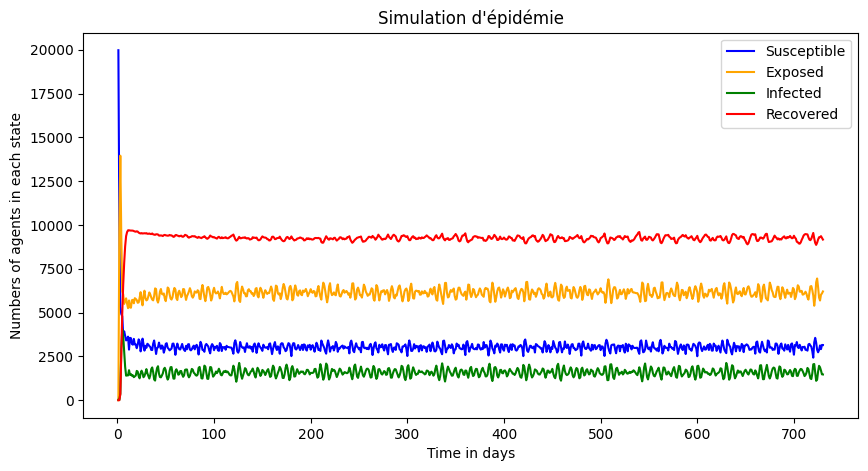

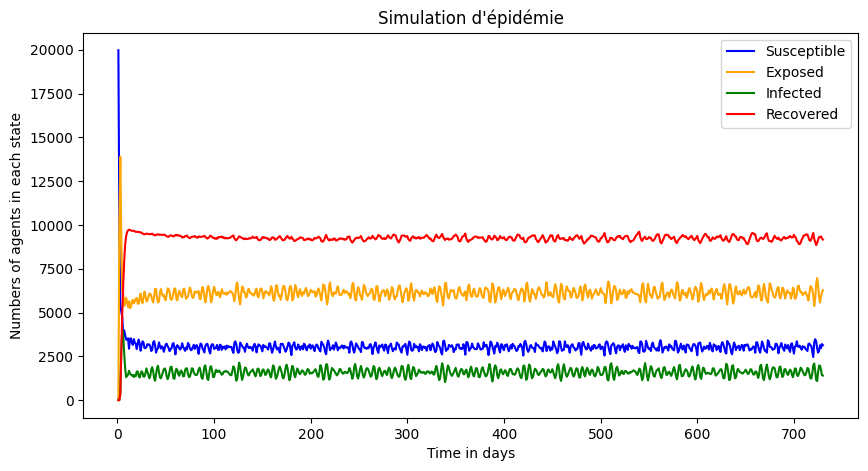

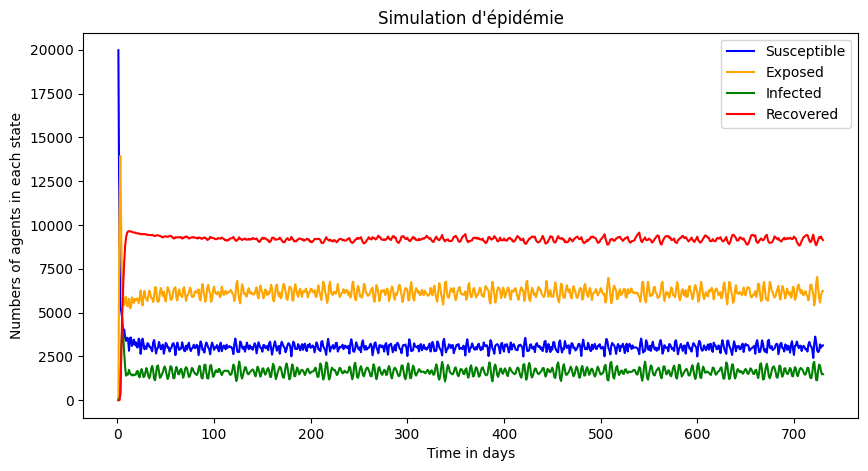

In [61]:
for i in range(100):
    file_path = f'resultats/resultat{i}.csv'
    plot_epidemic_data(file_path)

II) Fonction pour calculer la moyenne

Cette fonction crée un fichier moyenne rempli d'abord de 0, puis ajoute les valeurs des 100 fichiers csv pour obtenir la moyenne

In [57]:
def create_average_csv():
    # Définir le nombre de lignes
    num_lines = 730
    
    # Créer un tableau NumPy avec les valeurs initiales
    data = np.zeros((num_lines, 4))
    
    # Remplir toutes les lignes avec [0, 0, 0, 0]
    data.fill(0)
    
    # Écrire les données dans le fichier CSV
    np.savetxt('resultats/moyenne.csv', data, fmt='%d', delimiter=',', newline='\n')

    # Liste des noms de fichiers
    noms_fichiers = ["resultats/resultat{}.csv".format(i) for i in range(100)]

    # Charger le fichier moyenne.csv dans un tableau NumPy
    moyenne_data = np.loadtxt('resultats/moyenne.csv', delimiter=',')

    # Boucle à travers chaque fichier
    for nom_fichier in noms_fichiers:
        # Charger le fichier CSV dans un tableau NumPy
        fichier_data = np.loadtxt(nom_fichier, delimiter=',')
        
        # Additionner les valeurs des éléments correspondants
        moyenne_data += fichier_data

    # Calculer la moyenne
    moyenne_data /= len(noms_fichiers)

    # Écrire le tableau moyenne_data mis à jour dans un fichier CSV
    np.savetxt('resultats/moyenne.csv', moyenne_data, fmt='%.1f', delimiter=',', newline='\n')

Appel de la fonction pour créer le fichier voulu

In [58]:
create_average_csv()

Appel de la fonction pour afficher un graphique

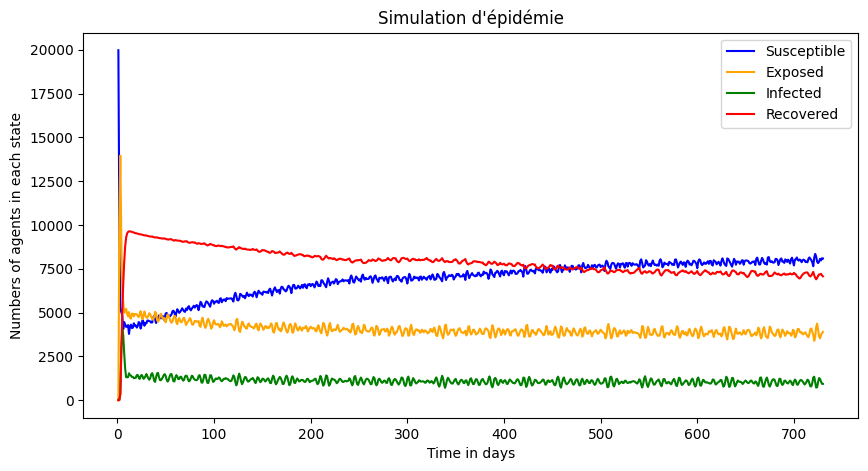

In [59]:
file_path_moyenne = "resultats/moyenne.csv"
plot_epidemic_data(file_path_moyenne)